In [211]:
%pip install pandas
%pip install matplotlib
%pip install datetime


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [213]:
import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = r"/Users/arvindersingh/Desktop/Projects/Volatility Modelling/data"


# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2012, 2022):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)
# Display first few rows to confirm
print(data.head())
print(len(data))


                 0        1        2        3        4  5
0  20120102 020000  1.29324  1.29381  1.29324  1.29332  0
1  20120102 020100  1.29326  1.29345  1.29275  1.29341  0
2  20120102 020200  1.29342  1.29344  1.29341  1.29343  0
3  20120102 020300  1.29342  1.29342  1.29335  1.29336  0
4  20120102 020400  1.29324  1.29347  1.29320  1.29346  0
3712747


In [214]:
df = data.copy()

In [215]:
df.head()

,0,1,2,3,4,5
0,20120102 020000,1.29324,1.29381,1.29324,1.29332,0
1,20120102 020100,1.29326,1.29345,1.29275,1.29341,0
2,20120102 020200,1.29342,1.29344,1.29341,1.29343,0
3,20120102 020300,1.29342,1.29342,1.29335,1.29336,0
4,20120102 020400,1.29324,1.29347,1.29320,1.29346,0


In [216]:
len(df)

3712747

In [217]:
df.columns

Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [218]:
df.tail()

,0,1,2,3,4,5
3712742,20211231 165400,1.13797,1.13797,1.13774,1.13774,0
3712743,20211231 165500,1.13775,1.13781,1.13748,1.13748,0
3712744,20211231 165600,1.13749,1.13765,1.13704,1.13707,0
3712745,20211231 165700,1.13709,1.13740,1.13679,1.13740,0
3712746,20211231 165800,1.13740,1.13740,1.13681,1.13686,0


In [219]:
data = df.copy()

In [220]:
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [221]:
# 1) Make a boolean mask for every duplicated timestamp (marking all occurrences)
dup_mask = data['DateTime'].duplicated(keep=False)

# 2) Subset and sort so we see each duplicated group in one place
dupe_rows = data.loc[dup_mask].sort_values('DateTime')

print(dupe_rows)

                DateTime     Open     High      Low    Close  Volume
2904338  20191027 190000  1.10839  1.10844  1.10836  1.10836       0
2904398  20191027 190000  1.10839  1.10844  1.10836  1.10836       0
2904339  20191027 190100  1.10837  1.10837  1.10826  1.10826       0
2904399  20191027 190100  1.10837  1.10837  1.10826  1.10826       0
2904340  20191027 190200  1.10826  1.10826  1.10822  1.10822       0
...                  ...      ...      ...      ...      ...     ...
3648533  20211031 195700  1.15526  1.15526  1.15518  1.15520       0
3648594  20211031 195800  1.15520  1.15545  1.15518  1.15545       0
3648534  20211031 195800  1.15520  1.15545  1.15518  1.15545       0
3648535  20211031 195900  1.15545  1.15555  1.15543  1.15551       0
3648595  20211031 195900  1.15545  1.15555  1.15543  1.15551       0

[360 rows x 6 columns]


In [222]:
data.set_index('DateTime', inplace=True)

In [223]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')

# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/2591843626.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


Missing Timestamps:
DatetimeIndex(['2012-01-02 09:24:00', '2012-01-02 10:41:00',
               '2012-01-02 12:29:00', '2012-01-02 12:32:00',
               '2012-01-02 12:34:00', '2012-01-02 12:36:00',
               '2012-01-02 12:45:00', '2012-01-02 13:08:00',
               '2012-01-02 13:15:00', '2012-01-02 13:16:00',
               ...
               '2021-12-30 23:48:00', '2021-12-31 00:25:00',
               '2021-12-31 00:43:00', '2021-12-31 00:48:00',
               '2021-12-31 00:52:00', '2021-12-31 01:58:00',
               '2021-12-31 02:17:00', '2021-12-31 13:43:00',
               '2021-12-31 14:07:00', '2021-12-31 14:36:00'],
              dtype='datetime64[ns]', length=1545772, freq=None)


In [224]:
missing_timestamps.shape   # All missing timestamps (including weekends)

(1545772,)

In [225]:
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [226]:
missing_df['indicator'] = 1
missing_df

,DateTime,indicator
0,2012-01-02 09:24:00,1
1,2012-01-02 10:41:00,1
2,2012-01-02 12:29:00,1
3,2012-01-02 12:32:00,1
4,2012-01-02 12:34:00,1
...,...,...
1545767,2021-12-31 01:58:00,1
1545768,2021-12-31 02:17:00,1
1545769,2021-12-31 13:43:00,1
1545770,2021-12-31 14:07:00,1


In [227]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [228]:
combined_df

,DateTime,Open,High,Low,Close,Volume
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0
...,...,...,...,...,...,...
5258514,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0
5258515,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0
5258516,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0
5258517,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0


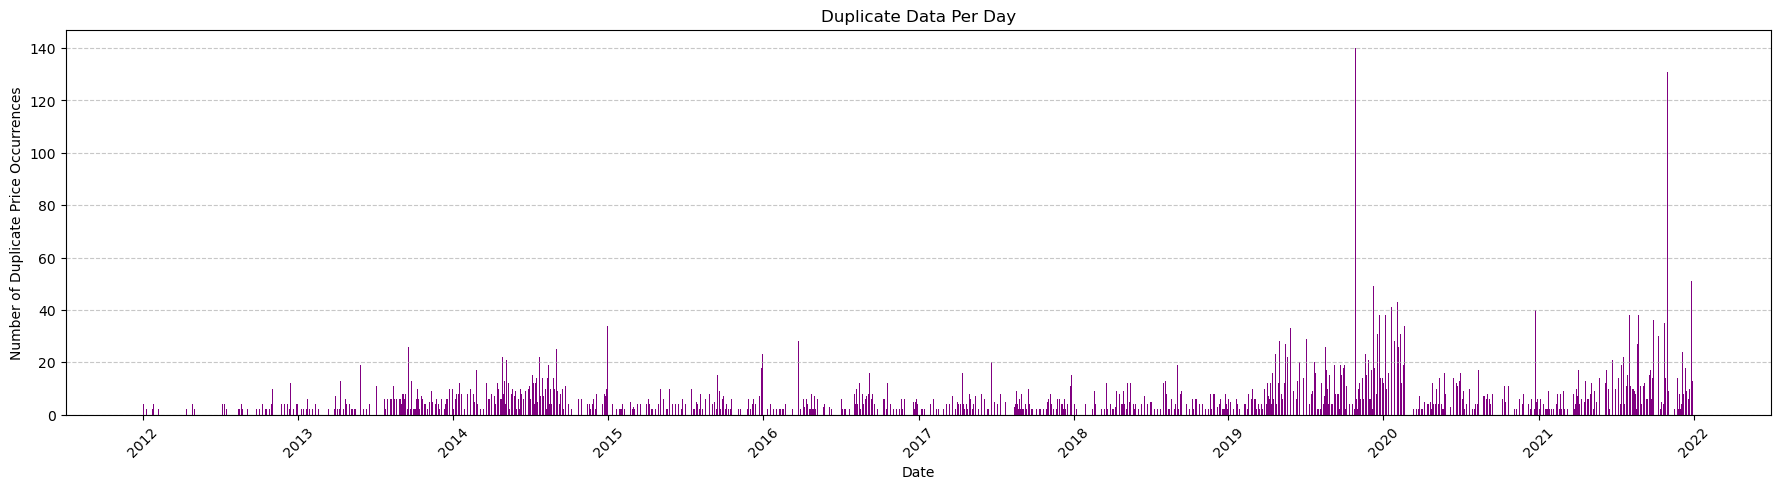

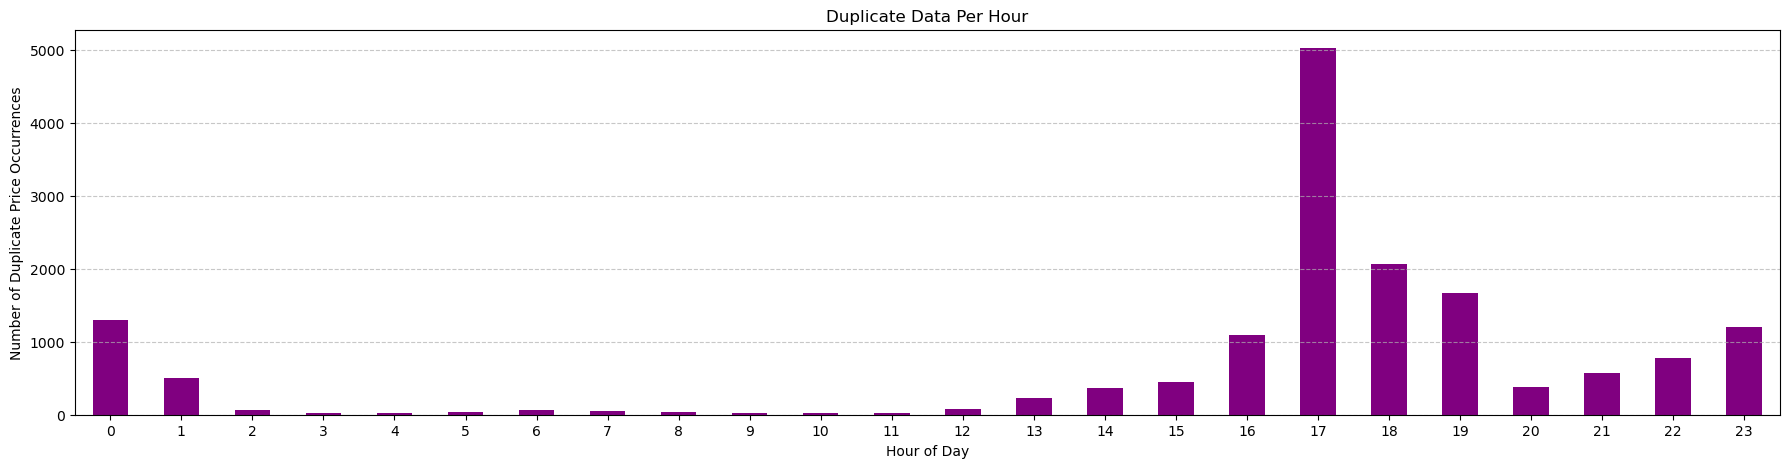

In [229]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# 
plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [230]:
def remove_all_consecutive_duplicates(df):
    """Remove consecutive OHLC duplicates and flat bars with no price movement"""
    df_clean = df.copy()
    
    while True:
        # Check for consecutive duplicates
        prev_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(1)) & 
            (df_clean['High'] == df_clean['High'].shift(1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(1))
        )
        
        next_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(-1)) & 
            (df_clean['High'] == df_clean['High'].shift(-1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(-1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(-1))
        )
        
        # Check for flat bars (no price movement)
        flat_bar = (
            (df_clean['Open'] == df_clean['High']) & 
            (df_clean['Open'] == df_clean['Low']) & 
            (df_clean['Open'] == df_clean['Close'])
        )
        
        # Combine conditions
        is_duplicate = prev_dup | next_dup | flat_bar
        count = is_duplicate.sum()
        
        if count == 0:
            break
            
        print(f"Marking {count} duplicates and flat bars…")

        # 1) blank out the OHLC
        df_clean.loc[is_duplicate, ['Open','High','Low','Close']] = np.nan
        df_clean.loc[is_duplicate, 'Volume'] = 0
        # 2) flag them
        df_clean.loc[is_duplicate, 'indicator'] = 1
        
    
    
    return df_clean

def remove_duplicate_timestamps(df):
    """
    Remove rows so that every DateTime is unique.
    Keeps the first occurrence of each timestamp and deletes all others.
    """
    df_clean = df.copy()

    while True:
        # Mark all rows whose DateTime appears more than once
        dup_mask = df_clean['DateTime'].duplicated(keep=False)
        if not dup_mask.any():
            break

        # Of those duplicates, keep only the first in each group
        to_remove = df_clean['DateTime'].duplicated(keep='first')
        count = to_remove.sum()
        print(f"Removing {count} rows with duplicate timestamps…")

        df_clean = df_clean.loc[~to_remove].reset_index(drop=True)

    return df_clean

def process_duplicated_data(df):
    """
    Process the DataFrame to remove duplicate timestamps and consecutive duplicates.
    """
    # Remove duplicate timestamps
    df = remove_duplicate_timestamps(df)

    # Remove consecutive duplicates and flat bars
    df = remove_all_consecutive_duplicates(df)

    return df


In [231]:
final_data_clean = process_duplicated_data(combined_df)

Removing 180 rows with duplicate timestamps…
Marking 57130 duplicates and flat bars…


In [232]:
final_data_clean

,DateTime,Open,High,Low,Close,Volume,indicator
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,NaN
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,NaN
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,NaN
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,NaN
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,NaN
...,...,...,...,...,...,...,...
5258334,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,NaN
5258335,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,NaN
5258336,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,NaN
5258337,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,NaN


In [233]:
final_data = final_data_clean.copy()


<Axes: >

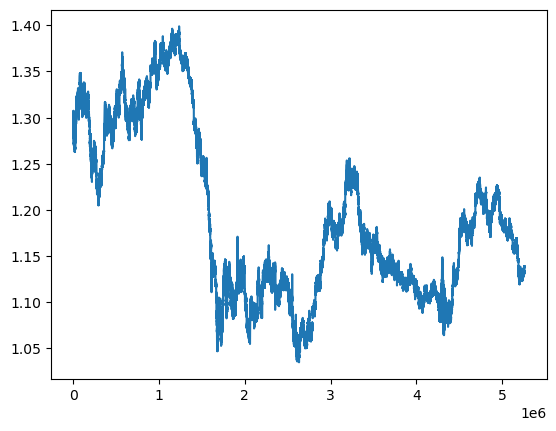

In [234]:
final_data['Close'].plot()    ### plot data nicely including years

In [235]:
data = final_data.copy()

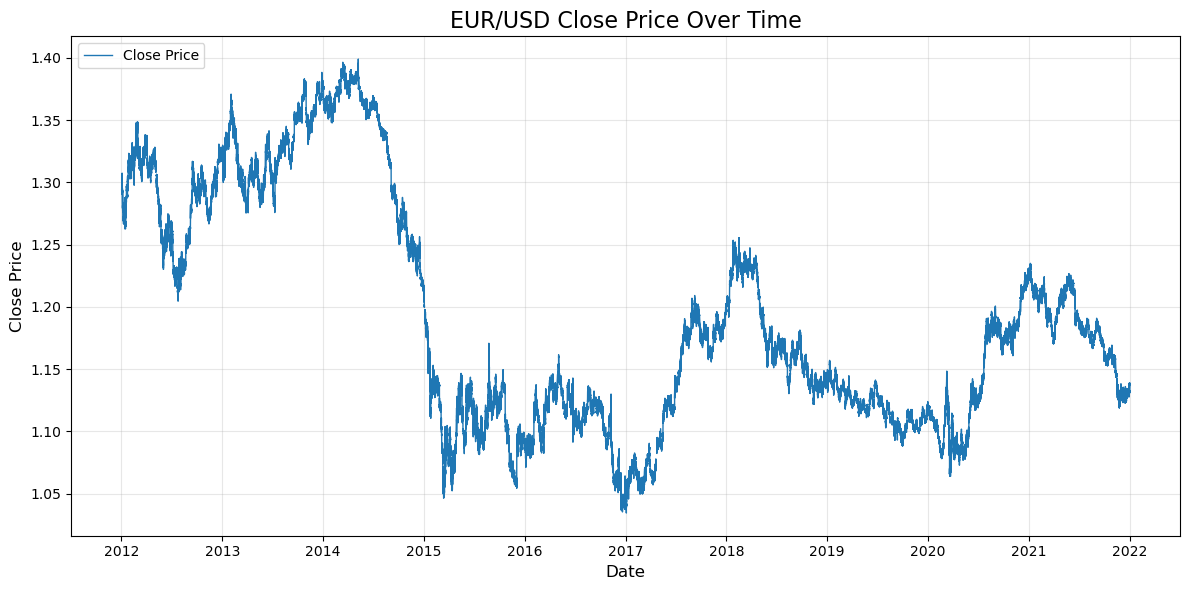

In [236]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [237]:
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

,DateTime,Open,High,Low,Close,Volume,indicator,Hour
0,2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,NaN,2
1,2012-01-02 02:01:00,1.29326,1.29345,1.29275,1.29341,0.0,NaN,2
2,2012-01-02 02:02:00,1.29342,1.29344,1.29341,1.29343,0.0,NaN,2
3,2012-01-02 02:03:00,1.29342,1.29342,1.29335,1.29336,0.0,NaN,2
4,2012-01-02 02:04:00,1.29324,1.29347,1.29320,1.29346,0.0,NaN,2
...,...,...,...,...,...,...,...,...
5258334,2021-12-31 16:54:00,1.13797,1.13797,1.13774,1.13774,0.0,NaN,16
5258335,2021-12-31 16:55:00,1.13775,1.13781,1.13748,1.13748,0.0,NaN,16
5258336,2021-12-31 16:56:00,1.13749,1.13765,1.13704,1.13707,0.0,NaN,16
5258337,2021-12-31 16:57:00,1.13709,1.13740,1.13679,1.13740,0.0,NaN,16


In [238]:
data.set_index('DateTime', inplace=True)

In [239]:
def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data = data.copy()
    
    # Check if DateTime is in index
    if isinstance(data.index, pd.DatetimeIndex):
        data.reset_index(inplace=True)
    
    # Convert to datetime
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    
    # Set DateTime as index BEFORE creating group_id
    data.set_index('DateTime', inplace=True)
    
    # Now create group_id using the DatetimeIndex
    data['group_id'] = data.index.floor(f"{minute_interval}T")
    
    # Build aggregation dictionary (now including group_id)
    agg_dict = {
        "Open": "first",
        "High": "max",
        "Low": "min",
        "Close": "last",
        "Volume": "sum",
        "indicator": "sum",
        "group_id": "first"  # Keep the group_id for each resampled bar
    }
    
    # Reset index temporarily for groupby
    data.reset_index(inplace=True)
    
    # Group by DateTime and aggregate
    data = data.groupby(pd.Grouper(key='DateTime', 
                                   freq=f'{minute_interval}Min',
                                   closed='right',
                                   label='right')).agg(agg_dict)
    
    # DateTime is already the index after groupby
    data.index.name = 'DateTime'
    
    return data

In [240]:
grouped_data = preprocess_ohlc_data(data, minute_interval=5)

/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/1133537241.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['group_id'] = data.index.floor(f"{minute_interval}T")


In [241]:
grouped_data

,Open,High,Low,Close,Volume,indicator,group_id
DateTime,,,,,,,
2012-01-02 02:00:00,1.29324,1.29381,1.29324,1.29332,0.0,0.0,2012-01-02 02:00:00
2012-01-02 02:05:00,1.29326,1.29415,1.29275,1.29392,0.0,0.0,2012-01-02 02:00:00
2012-01-02 02:10:00,1.29393,1.29442,1.29391,1.29425,0.0,0.0,2012-01-02 02:05:00
2012-01-02 02:15:00,1.29423,1.29447,1.29401,1.29416,0.0,0.0,2012-01-02 02:10:00
2012-01-02 02:20:00,1.29420,1.29427,1.29417,1.29419,0.0,1.0,2012-01-02 02:15:00
...,...,...,...,...,...,...,...
2021-12-31 16:40:00,1.13777,1.13789,1.13777,1.13787,0.0,0.0,2021-12-31 16:35:00
2021-12-31 16:45:00,1.13787,1.13788,1.13773,1.13784,0.0,0.0,2021-12-31 16:40:00
2021-12-31 16:50:00,1.13783,1.13805,1.13763,1.13799,0.0,0.0,2021-12-31 16:45:00


In [242]:
def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data = data.copy()
    
    # Check if DateTime is in index
    if isinstance(data.index, pd.DatetimeIndex):
        data.reset_index(inplace=True)
    
    # Convert to datetime
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    
    # Set DateTime as index BEFORE creating group_id
    data.set_index('DateTime', inplace=True)
    
    # Now create group_id using the DatetimeIndex
    data['group_id'] = data.index.floor(f"{minute_interval}T")
    
    # Build aggregation dictionary (now including group_id)
    agg_dict = {
        "Open": "first",
        "High": "max",
        "Low": "min",
        "Close": "last",
        "Volume": "sum",
        "indicator": "sum",
        "group_id": "first"  # Keep the group_id for each resampled bar
    }
    
    # Reset index temporarily for groupby
    data.reset_index(inplace=True)
    
    # Group by DateTime and aggregate
    data = data.groupby(pd.Grouper(key='DateTime', 
                                   freq=f'{minute_interval}Min',
                                   closed='right',
                                   label='right')).agg(agg_dict)
    
    # DateTime is already the index after groupby
    data.index.name = 'DateTime'
    
    return data

def compute_volatility_measure(ohlc_data, vol_measure):
    """
    Calculate volatility using the specified method.
    
    Parameters:
    - ohlc_data (pd.DataFrame): OHLC data
    - vol_measure (str): Volatility measure ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close')
    
    Returns:
    - ohlc_data (pd.DataFrame): OHLC data with volatility measure added
    """
    # Make a copy to avoid modifying the input
    ohlc_data = ohlc_data.copy()
    
    # Constant for Garman-Klass
    k = 2 * np.log(2) - 1
    
    # Compute volatility measures (Variance)
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - \
                       k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    
    elif vol_measure == 'Rogers-Satchell':


        H, L, C = ohlc_data['High'], ohlc_data['Low'], ohlc_data['Close']
        P = ohlc_data['Prev_Close_global']   # <— from step 1
        ohlc_data['V'] = np.log(H/P)*np.log(H/C) + np.log(L/P)*np.log(L/C)
                        
    
    elif vol_measure == 'Close-to-Close':
        ohlc_data['V'] = ohlc_data['Log_Returns_global']**2
        #print(ohlc_data['V'])
    
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")
    
    return ohlc_data

def setup_rvol_col(data, timeframe, vol_measure):
    """
    The overall purpose is to:
    1. Compute variance contributions for each row
    2. Calculate realized volatility for each group
    3. Attach the group's volatility to every row in that group
    """
    # 1) Compute per-bar variance contributions (V) for each row
    v_by_group = data.groupby('group_id')\
                     .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
    
    # If it came back as a DataFrame, pick its 'V' column
    if isinstance(v_by_group, pd.DataFrame):
        v_series = v_by_group['V']
    else:
        v_series = v_by_group
    
    # Ensure index is consistent
    v_series = v_series.reset_index(level=0, drop=True)
    
    # 2) Attach per-bar V back onto a copy of your DataFrame
    df = data.copy()
    df['V'] = np.nan  # Preallocate
    df.loc[v_series.index, 'V'] = v_series
    
    # 3) Compute per-group sum of V and count of rows
    grp_stats = (df.groupby('group_id')['V'].agg(sum='sum', count='count'))
    print(grp_stats)
        # Sample variance WITHOUT using (n_minus_1)
    grp_stats['n_minus_1'] = grp_stats['count']
    grp_stats['var'] = np.where(
        grp_stats['n_minus_1'] > 0,
        grp_stats['sum'],
        np.nan
    )
    

    # 4) √variance → realized vol, annualize as before
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    annualized_rvol = rvol_per_group * np.sqrt(365 * 24 * 60/ timeframe)

    # 5) Map both back onto every row
    df[col_name]    = df['group_id'].map(annualized_rvol)*100
    df['n_minus_1'] = df['group_id'].map(grp_stats['n_minus_1'])
    

    return df

def preprocess_by_group_id(rvol, vol_title):
    # Ensure 'DateTime' is in datetime format
    if isinstance(rvol.index, pd.DatetimeIndex):
        rvol.reset_index(inplace=True)
    
    # Convert DateTime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(rvol['DateTime']):
        rvol['DateTime'] = pd.to_datetime(rvol['DateTime'])
    
    # Group by group_id
    grouped = rvol.groupby('group_id')
    
    
    # Aggregate the data
    aggregated = grouped.agg({
        "DateTime": ["first", "last"],  # Keep first and last datetime for reference
        "Open": "first",                # First price in the group
        "High": "max",                  # Highest price in the group
        "Low": "min",                   # Lowest price in the group
        "Close": "last",                # Last price in the group
        "Volume": "sum",                # Sum of volume
        "indicator": "sum",             # Sum of indicator
        'n_minus_1': "mean",             # Mean of count
    })
    
    # Add vol_title aggregation explicitly
    #aggregated[vol_title] = grouped[vol_title].mean()
    
    #  — Compute mode of vol_title instead of mean:
    mode_series = grouped[vol_title].apply(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
    aggregated[vol_title] = mode_series.values
    
    # Flatten multi-level column names
    aggregated.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in aggregated.columns]
    
    # Rename datetime columns for clarity
    aggregated.rename(columns={
        'DateTime_first': 'StartDateTime',
        'DateTime_last': 'EndDateTime',
        'n_minus_1_mean': 'count'  
    }, inplace=True)

    # Reset index to make group_id a regular column
    aggregated.reset_index(inplace=True)
    #print(aggregated)
    #aggregated['count'] = aggregated['n_minus_1'] # Rename n_minus_1 to count for clarity
    return aggregated

def returns(data):
    time_col = 'DateTime'
    if 'EndDateTime' in data.columns:
        time_col = 'EndDateTime'
    elif 'StartDateTime' in data.columns:
        time_col = 'StartDateTime'
    elif 'DateTime' not in data.columns:
        raise KeyError("No valid time column found for plotting.")

    data['Prev_Close_global']  = data['Close_last'].shift(1)
    data['Prev_Close_global'].fillna(data['Open_first'], inplace=True)
    data['Log_Returns_global'] = np.log(data['Close_last'] / data['Prev_Close_global'])

    return data


def calculate_rvol(data, vol_measure, timeframe, minute_interval, threshold, vol_title, plot=True):
    
    # Input validation
    assert timeframe % 5 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    # Work with a copy
    data = data.copy()
    
    ### Step 0: Ensure DateTime is in the index
    if not isinstance(data.index, pd.DatetimeIndex):
        if 'DateTime' in data.columns:
            data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
            data.set_index('DateTime', inplace=True)
        else:
            raise KeyError("DataFrame must have a 'DateTime' column or DatetimeIndex")
    
    ### Step 0.5: Create group_id BEFORE doing anything else
    data['group_id'] = data.index.floor(f"{timeframe}T")
    
    ### Step 1: Prepare data with necessary columns
    data['Prev_Close_global'] = data['Close'].shift(1)
    data['Prev_Close_global'].fillna(data['Open'], inplace=True)
    data['Log_Returns_global'] = np.log(data['Close'] / data['Prev_Close_global'])
    
    # Step 2: Use the data (with group_id already created)
    grouped_ohlc_data = data.copy()
    
    # Step 3: Compute volatility measures
    compute_volatility_measure(grouped_ohlc_data, vol_measure)
    
    # Step 4: Aggregate into realized volatility
    rvol_df1 = setup_rvol_col(grouped_ohlc_data, timeframe, vol_measure)
    
    # Step 5: Preprocess by group_id
    rvol_df = preprocess_by_group_id(rvol_df1, vol_title=vol_title)
    returns(rvol_df)
    
    return rvol_df

In [243]:
CC_120m_rvol = calculate_rvol(data, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1,threshold=0.1667, vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/3761419308.py:220: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['group_id'] = data.index.floor(f"{timeframe}T")
/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/3761419308.py:224: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/3761419308.py:96: DeprecationWarning: Da

                              sum  count
group_id                                
2012-01-02 02:00:00  2.390660e-06    119
2012-01-02 04:00:00  6.528883e-06    119
2012-01-02 06:00:00  1.139618e-06    118
2012-01-02 08:00:00  1.449495e-06    116
2012-01-02 10:00:00  9.088269e-07    114
...                           ...    ...
2021-12-31 08:00:00  3.623978e-06    120
2021-12-31 10:00:00  7.476214e-06    120
2021-12-31 12:00:00  5.878490e-07    118
2021-12-31 14:00:00  3.586935e-07    110
2021-12-31 16:00:00  7.859022e-07     59

[43820 rows x 2 columns]


/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/3761419308.py:196: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open_first'], inplace=True)


In [244]:
CC_120m_rvol

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,count,RVol_120min_Close-to-Close,Prev_Close_global,Log_Returns_global
0,2012-01-02 02:00:00,2012-01-02 02:00:00,2012-01-02 03:59:00,1.29324,1.29531,1.29275,1.29383,0.0,1.0,119.0,10.232835,1.29324,0.000456
1,2012-01-02 04:00:00,2012-01-02 04:00:00,2012-01-02 05:59:00,1.29384,1.29709,1.29381,1.29457,0.0,1.0,119.0,16.910501,1.29383,0.000572
2,2012-01-02 06:00:00,2012-01-02 06:00:00,2012-01-02 07:59:00,1.29454,1.29514,1.29311,1.29381,0.0,2.0,118.0,7.065073,1.29457,-0.000587
3,2012-01-02 08:00:00,2012-01-02 08:00:00,2012-01-02 09:59:00,1.29382,1.29442,1.29227,1.29327,0.0,3.0,116.0,7.967928,1.29381,-0.000417
4,2012-01-02 10:00:00,2012-01-02 10:00:00,2012-01-02 11:59:00,1.29325,1.29413,1.29167,1.29197,0.0,5.0,114.0,6.309249,1.29327,-0.001006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43815,2021-12-31 08:00:00,2021-12-31 08:00:00,2021-12-31 09:59:00,1.13253,1.13534,1.13191,1.13437,0.0,0.0,120.0,12.598818,1.13252,0.001632
43816,2021-12-31 10:00:00,2021-12-31 10:00:00,2021-12-31 11:59:00,1.13438,1.13796,1.13379,1.13790,0.0,0.0,120.0,18.095806,1.13437,0.003107
43817,2021-12-31 12:00:00,2021-12-31 12:00:00,2021-12-31 13:59:00,1.13790,1.13863,1.13747,1.13846,0.0,1.0,118.0,5.074228,1.13790,0.000492
43818,2021-12-31 14:00:00,2021-12-31 14:00:00,2021-12-31 15:59:00,1.13848,1.13856,1.13760,1.13760,0.0,8.0,110.0,3.963682,1.13846,-0.000756


In [245]:
df_1 = CC_120m_rvol.copy()

In [246]:
df_1 = CC_120m_rvol = CC_120m_rvol.dropna(subset=['RVol_120min_Close-to-Close'])

In [247]:
df_1['Log_returns'] = df_1['Log_Returns_global']*((365*24*60)**0.5)*100
df_1['Log_returns_squared'] = df_1['Log_returns']**2


/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/3950333148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Log_returns'] = df_1['Log_Returns_global']*((365*24*60)**0.5)*100
/var/folders/s3/cdsmx4md3s14lbpr9whwgss80000gn/T/ipykernel_7139/3950333148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Log_returns_squared'] = df_1['Log_returns']**2


In [248]:
df_1 

,group_id,StartDateTime,EndDateTime,Open_first,High_max,Low_min,Close_last,Volume_sum,indicator_sum,count,RVol_120min_Close-to-Close,Prev_Close_global,Log_Returns_global,Log_returns,Log_returns_squared
0,2012-01-02 02:00:00,2012-01-02 02:00:00,2012-01-02 03:59:00,1.29324,1.29531,1.29275,1.29383,0.0,1.0,119.0,10.232835,1.29324,0.000456,33.067511,1093.460317
1,2012-01-02 04:00:00,2012-01-02 04:00:00,2012-01-02 05:59:00,1.29384,1.29709,1.29381,1.29457,0.0,1.0,119.0,16.910501,1.29383,0.000572,41.453195,1718.367415
2,2012-01-02 06:00:00,2012-01-02 06:00:00,2012-01-02 07:59:00,1.29454,1.29514,1.29311,1.29381,0.0,2.0,118.0,7.065073,1.29457,-0.000587,-42.573881,1812.535355
3,2012-01-02 08:00:00,2012-01-02 08:00:00,2012-01-02 09:59:00,1.29382,1.29442,1.29227,1.29327,0.0,3.0,116.0,7.967928,1.29381,-0.000417,-30.265063,915.974035
4,2012-01-02 10:00:00,2012-01-02 10:00:00,2012-01-02 11:59:00,1.29325,1.29413,1.29167,1.29197,0.0,5.0,114.0,6.309249,1.29327,-0.001006,-72.912199,5316.188748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43815,2021-12-31 08:00:00,2021-12-31 08:00:00,2021-12-31 09:59:00,1.13253,1.13534,1.13191,1.13437,0.0,0.0,120.0,12.598818,1.13252,0.001632,118.331141,14002.258924
43816,2021-12-31 10:00:00,2021-12-31 10:00:00,2021-12-31 11:59:00,1.13438,1.13796,1.13379,1.13790,0.0,0.0,120.0,18.095806,1.13437,0.003107,225.254146,50739.430462
43817,2021-12-31 12:00:00,2021-12-31 12:00:00,2021-12-31 13:59:00,1.13790,1.13863,1.13747,1.13846,0.0,1.0,118.0,5.074228,1.13790,0.000492,35.670136,1272.358596
43818,2021-12-31 14:00:00,2021-12-31 14:00:00,2021-12-31 15:59:00,1.13848,1.13856,1.13760,1.13760,0.0,8.0,110.0,3.963682,1.13846,-0.000756,-54.786359,3001.545138


In [249]:
def compute_weighted_sum_vectorized(df_1, df_2, max_lag):
    """
    Vectorized implementation - processes all lambdas at once!
    """
    
    lam_grid = np.array([
    0.001, 0.002, 0.005, 
    0.01, 0.02, 0.03, 0.05, 0.07,
    0.1, 0.15, 0.2, 0.3, 0.5, 0.7,
    1.0, 2.0, 3.0, 5.0,
    10.0
])
    n = len(df_1)
    num_lambdas = len(lam_grid)
    
    # Initialize result matrices (rows=time, cols=lambdas)
    result_1 = np.zeros((n, num_lambdas))
    result_2 = np.zeros((n, num_lambdas))
    
    # First row
    result_1[0, :] = df_1.iloc[0]
    result_2[0, :] = df_2.iloc[0]
    
    # Precompute decay factors for all lambdas
    decay_factors = np.exp(-lam_grid)  # Shape: (num_lambdas,)
    
    # Vectorized recursive computation
    for t in range(1, n):
        result_1[t, :] = decay_factors * result_1[t-1, :] + df_1.iloc[t]
        result_2[t, :] = decay_factors * result_2[t-1, :] + df_2.iloc[t]
    
    # Convert to DataFrame
    features_df = pd.DataFrame(index=df_1.index)
    for i, lam in enumerate(lam_grid):
        features_df[f'R1_lambda_{lam}'] = result_1[:, i]
    for i, lam in enumerate(lam_grid):
        features_df[f'R2_lambda_{lam}'] = np.sqrt(result_2[:, i])
    
    return features_df

In [250]:
features_df = compute_weighted_sum_vectorized(df_1 = df_1['Log_returns'] , df_2 = df_1['Log_returns_squared'], max_lag = 200)

In [251]:
max_lag = 200
features_df = features_df[max_lag:]

In [252]:
features_df

,R1_lambda_0.001,R1_lambda_0.002,R1_lambda_0.005,R1_lambda_0.01,R1_lambda_0.02,R1_lambda_0.03,R1_lambda_0.05,R1_lambda_0.07,R1_lambda_0.1,R1_lambda_0.15,...,R2_lambda_0.15,R2_lambda_0.2,R2_lambda_0.3,R2_lambda_0.5,R2_lambda_0.7,R2_lambda_1.0,R2_lambda_2.0,R2_lambda_3.0,R2_lambda_5.0,R2_lambda_10.0
269,1215.619401,1253.641746,1302.469552,1254.286606,1009.490566,779.997247,490.366312,341.894315,232.475350,161.352333,...,325.176039,289.359227,249.098101,210.201844,187.577416,164.201313,123.407211,107.913502,99.894559,98.630932
270,1247.805268,1284.537846,1329.374337,1275.207124,1022.902192,790.345723,499.851743,352.181025,243.753274,172.278118,...,303.523330,263.944940,216.986840,167.078017,136.338238,105.044802,56.362095,41.175299,34.392676,33.407489
271,1268.260408,1303.673660,1344.446377,1284.220924,1024.349694,788.689799,497.176008,350.073734,242.259405,169.983473,...,282.426855,239.811280,188.019012,131.917902,98.496576,67.307678,30.015137,23.566927,21.885173,21.703489
272,1255.864198,1289.940334,1326.612338,1260.314128,992.937627,754.251908,461.799863,315.278001,208.076790,135.177546,...,262.255897,217.275403,162.211654,103.338733,70.295841,42.313807,15.677056,12.308417,11.272648,11.129545
273,1217.315752,1250.069822,1282.702622,1210.480583,935.982935,694.667186,401.984409,256.670051,150.982456,79.055183,...,246.147701,200.104764,144.511772,88.700958,62.005341,45.270921,37.736519,37.394198,37.304687,37.293285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43815,-1639.405223,-750.496722,60.541216,217.838860,185.334300,160.870918,144.103168,140.014502,138.864668,139.853104,...,184.872877,157.684007,134.268351,123.058448,120.682088,119.457587,118.473142,118.350863,118.331660,118.331142
43816,-1412.512490,-523.743082,285.493412,440.925473,406.918582,381.370610,362.329320,355.802802,350.904094,345.626829,...,283.119570,266.639369,253.169694,244.794517,240.773299,236.620186,229.431866,226.796813,225.463473,225.255557
43817,-1375.430548,-487.026507,319.739643,472.208327,434.531190,405.769541,380.328447,367.418470,353.181291,333.153904,...,265.073314,243.887870,220.805398,193.954422,173.379045,147.883745,91.631163,61.913212,40.185494,35.702412
43818,-1428.842164,-540.839786,263.358576,412.723417,371.140537,338.990880,306.993250,287.792352,264.785288,231.961864,...,251.948827,227.377899,197.788157,160.680454,133.899384,105.104339,64.326174,56.501250,54.885573,54.786887


In [253]:
features_df

,R1_lambda_0.001,R1_lambda_0.002,R1_lambda_0.005,R1_lambda_0.01,R1_lambda_0.02,R1_lambda_0.03,R1_lambda_0.05,R1_lambda_0.07,R1_lambda_0.1,R1_lambda_0.15,...,R2_lambda_0.15,R2_lambda_0.2,R2_lambda_0.3,R2_lambda_0.5,R2_lambda_0.7,R2_lambda_1.0,R2_lambda_2.0,R2_lambda_3.0,R2_lambda_5.0,R2_lambda_10.0
269,1215.619401,1253.641746,1302.469552,1254.286606,1009.490566,779.997247,490.366312,341.894315,232.475350,161.352333,...,325.176039,289.359227,249.098101,210.201844,187.577416,164.201313,123.407211,107.913502,99.894559,98.630932
270,1247.805268,1284.537846,1329.374337,1275.207124,1022.902192,790.345723,499.851743,352.181025,243.753274,172.278118,...,303.523330,263.944940,216.986840,167.078017,136.338238,105.044802,56.362095,41.175299,34.392676,33.407489
271,1268.260408,1303.673660,1344.446377,1284.220924,1024.349694,788.689799,497.176008,350.073734,242.259405,169.983473,...,282.426855,239.811280,188.019012,131.917902,98.496576,67.307678,30.015137,23.566927,21.885173,21.703489
272,1255.864198,1289.940334,1326.612338,1260.314128,992.937627,754.251908,461.799863,315.278001,208.076790,135.177546,...,262.255897,217.275403,162.211654,103.338733,70.295841,42.313807,15.677056,12.308417,11.272648,11.129545
273,1217.315752,1250.069822,1282.702622,1210.480583,935.982935,694.667186,401.984409,256.670051,150.982456,79.055183,...,246.147701,200.104764,144.511772,88.700958,62.005341,45.270921,37.736519,37.394198,37.304687,37.293285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43815,-1639.405223,-750.496722,60.541216,217.838860,185.334300,160.870918,144.103168,140.014502,138.864668,139.853104,...,184.872877,157.684007,134.268351,123.058448,120.682088,119.457587,118.473142,118.350863,118.331660,118.331142
43816,-1412.512490,-523.743082,285.493412,440.925473,406.918582,381.370610,362.329320,355.802802,350.904094,345.626829,...,283.119570,266.639369,253.169694,244.794517,240.773299,236.620186,229.431866,226.796813,225.463473,225.255557
43817,-1375.430548,-487.026507,319.739643,472.208327,434.531190,405.769541,380.328447,367.418470,353.181291,333.153904,...,265.073314,243.887870,220.805398,193.954422,173.379045,147.883745,91.631163,61.913212,40.185494,35.702412
43818,-1428.842164,-540.839786,263.358576,412.723417,371.140537,338.990880,306.993250,287.792352,264.785288,231.961864,...,251.948827,227.377899,197.788157,160.680454,133.899384,105.104339,64.326174,56.501250,54.885573,54.786887


In [254]:
y = df_1['RVol_120min_Close-to-Close']
y = y[max_lag:]
y

269       7.752876
270       4.366758
271       5.321487
272       9.134990
273       7.341280
           ...    
43815    12.598818
43816    18.095806
43817     5.074228
43818     3.963682
43819     5.867071
Name: RVol_120min_Close-to-Close, Length: 31391, dtype: float64

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import pandas as pd




# Keep as DataFrame/Series to preserve timestamps
X = features_df
y = CC_120m_rvol['RVol_120min_Close-to-Close']
y = y[max_lag:]

# Split while preserving index (timestamps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Standardize
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    index=X_train.index,
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index=X_test.index,
    columns=X_test.columns
)

# Train Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_array = lasso.predict(X_test_scaled)

# Convert predictions to Series with timestamps
y_pred = pd.Series(y_pred_array, index=y_test.index, name='Lasso_Prediction')

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Lasso - MSE: {mse:.6e}, R²: {r2:.6f}")

# Train LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
y_pred_cv_array = lassocv.predict(X_test_scaled)

# Convert predictions to Series with timestamps
y_pred_cv = pd.Series(y_pred_cv_array, index=y_test.index, name='LassoCV_Prediction')

y_train_pred = lasso.predict(X_train_scaled)
y_train_pred_cv = lassocv.predict(X_train_scaled)

r2_train = r2_score(y_train, y_train_pred)
print(f"Lasso - Train R²: {r2_train:.6f}, Test R²: {r2:.6f}")
r2_cv_train = r2_score(y_train, y_train_pred_cv)
mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv_test = r2_score(y_test, y_pred_cv)
print(f"LassoCV - MSE: {mse_cv:.6e}, R²: {r2_cv_test:.6f}")

print(f"LassoCV - Train R²: {r2_cv_train:.6f}, Test R²: {r2_cv_test:.6f}")


Lasso - MSE: 8.595836e+00, R²: 0.548186


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.74592337568174, tolerance: 61.10082033896947
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63.021704897109885, tolerance: 61.10082033896947
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.377852214092854, tolerance: 59.51140649424208
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:6

Lasso - Train R²: 0.569878, Test R²: 0.548186
LassoCV - MSE: 8.427891e+00, R²: 0.557013
LassoCV - Train R²: 0.578918, Test R²: 0.557013


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.212e+03, tolerance: 7.131e+01
  model = cd_fast.enet_coordinate_descent(


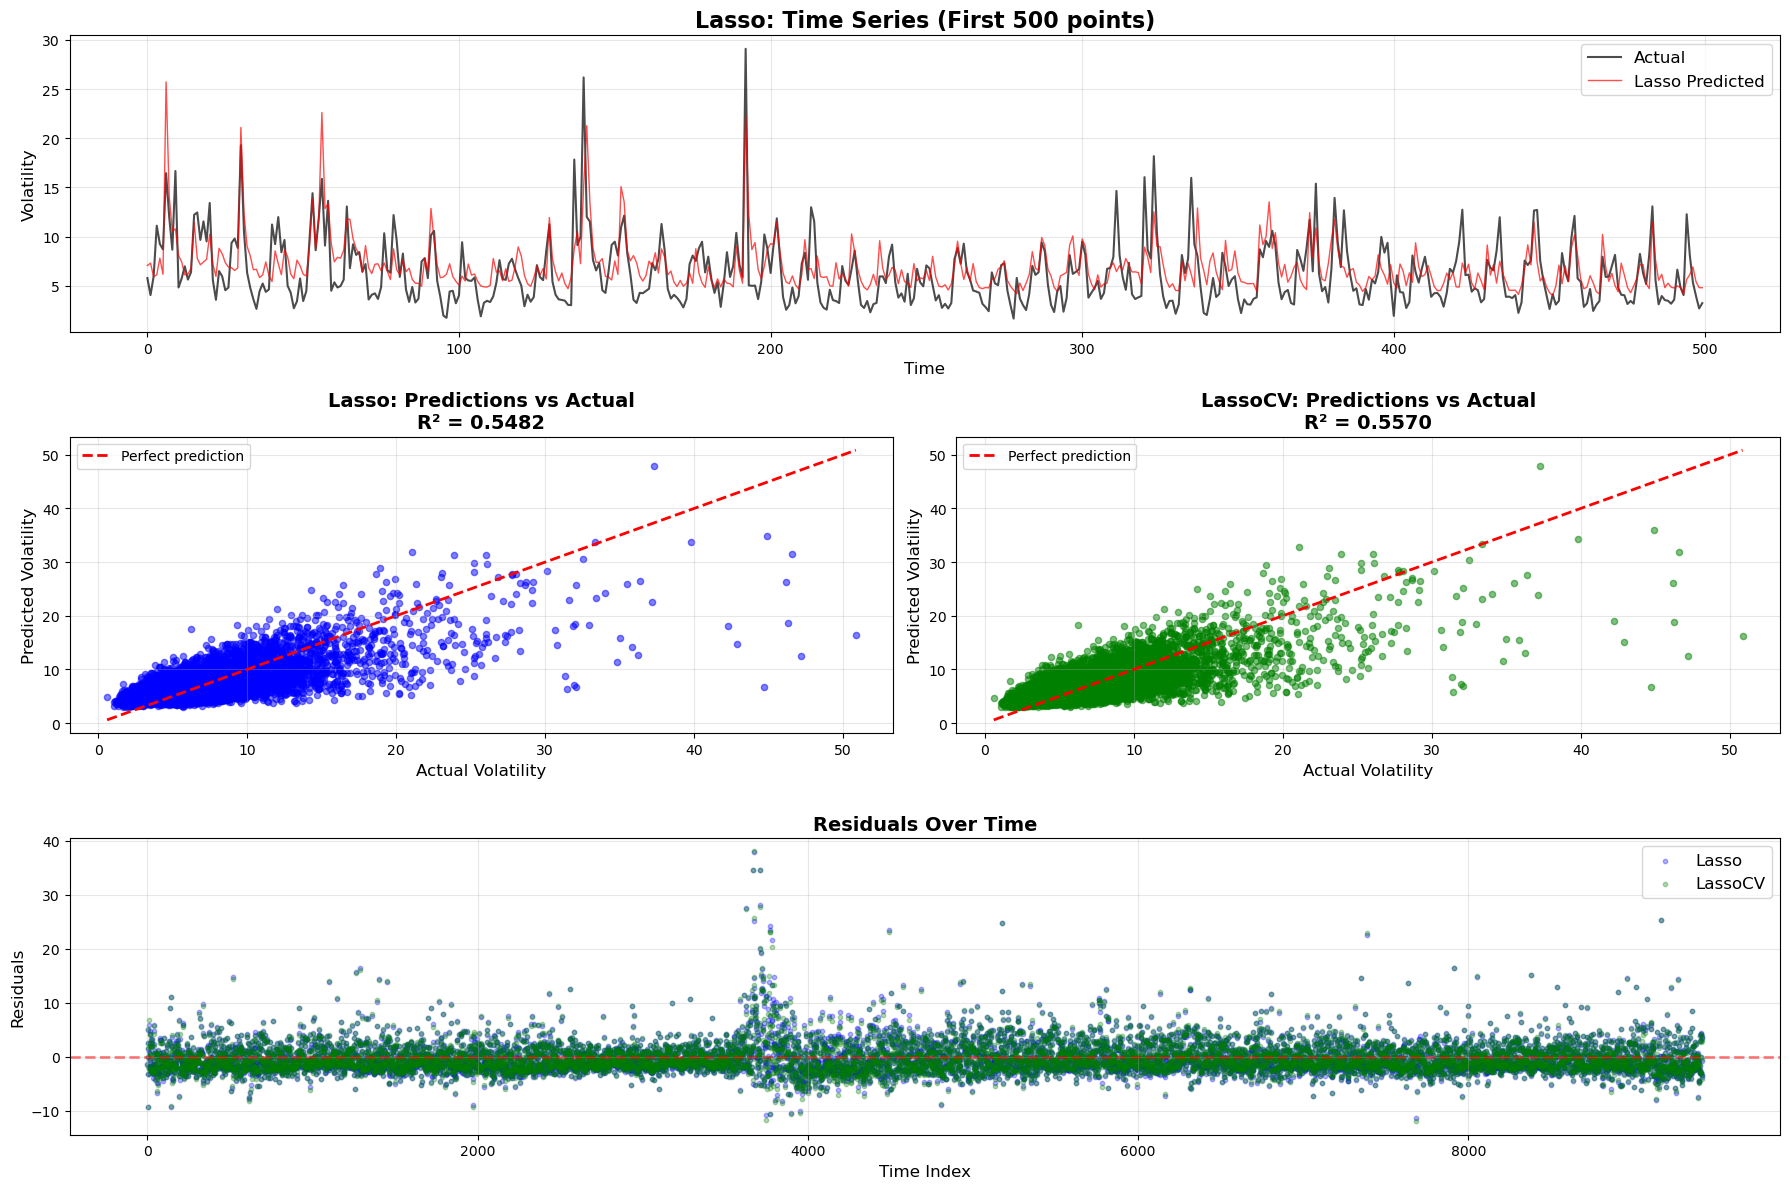

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# VISUALIZATION 1: TIME SERIES AND PREDICTIONS
# ============================================================================

fig1 = plt.figure(figsize=(18, 12))

# Plot 1: Time Series (LARGE - spans 2 columns)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, fig=fig1)
plot_idx = range(500)
ax1.plot(plot_idx, y_test[:len(plot_idx)], label='Actual', alpha=0.7, linewidth=1.5, color='black')
ax1.plot(plot_idx, y_pred[:len(plot_idx)], color='r', label='Lasso Predicted', alpha=0.7, linewidth=1.0)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Volatility', fontsize=12)
ax1.set_title('Lasso: Time Series (First 500 points)', fontsize=16, fontweight='bold')
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 2: Predictions vs Actual (Lasso) - bottom left
ax2 = plt.subplot2grid((3, 2), (1, 0), fig=fig1)
ax2.scatter(y_test, y_pred, alpha=0.5, s=20, color='blue')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect prediction')
ax2.set_xlabel('Actual Volatility', fontsize=12)
ax2.set_ylabel('Predicted Volatility', fontsize=12)
ax2.set_title(f'Lasso: Predictions vs Actual\nR² = {r2:.4f}', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Predictions vs Actual (LassoCV) - bottom right
ax3 = plt.subplot2grid((3, 2), (1, 1), fig=fig1)
ax3.scatter(y_test, y_pred_cv, alpha=0.5, s=20, color='green')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect prediction')
ax3.set_xlabel('Actual Volatility', fontsize=12)
ax3.set_ylabel('Predicted Volatility', fontsize=12)
ax3.set_title(f'LassoCV: Predictions vs Actual\nR² = {r2_cv_test:.4f}', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Residuals over time (LARGE - spans 2 columns)
ax4 = plt.subplot2grid((3, 2), (2, 0), colspan=2, fig=fig1)
residuals = y_test - y_pred
residuals_cv = y_test - y_pred_cv
ax4.scatter(range(len(y_test)), residuals, alpha=0.3, s=10, label='Lasso', color='blue')
ax4.scatter(range(len(y_test)), residuals_cv, alpha=0.3, s=10, label='LassoCV', color='green')
ax4.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=2)
ax4.set_xlabel('Time Index', fontsize=12)
ax4.set_ylabel('Residuals', fontsize=12)
ax4.set_title('Residuals Over Time', fontsize=14, fontweight='bold')
ax4.legend(fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()